In [1]:
import pandas as pd
import numpy as np
from itertools import *

# Step 0: Business context

Business goals: Answer the following questions
1. what is the leading smartphone company
2. what model is the leading model in the word
3. what model has the best margins

-> data only has a few features. Answer these questions instead
1. what is the most popular smartphone brand by rating
2. what is the most popular model by rating
3. what is the most expensive model
4. what is the fastest model
5. what model has the best camera
6. what is the largest model
7. what model has the most battery life

# Step 1: load in data

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment',None)
np.set_printoptions(threshold=np.inf)

def open_data(repo, file):
    with open("".join([repo, file]), "r", errors="ignore") as r:
        file = pd.read_csv(r, engine="python")
        print(file.info())
    return file

repo = r"C:/Users/benno/OneDrive/Python/Dash/Deployment_ready/smartphones/"
file = "smartphones.csv"

smart = open_data(repo, file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ï»¿brand_name              980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

# Step 2: Summaries

In [4]:
import warnings
warnings.filterwarnings("ignore")

def summary_dataframe_small(df):

	return pd.DataFrame({'features': df.columns,'dtypes': [df.dtypes[i] for i in range(len(df.columns))],
	'nulls':[df[df.columns[i]].isnull().sum() for i in range(len(df.columns))],'nonnuls / 1.0': (df.shape[0] - 
	df.isnull().sum().values) / df.shape[0],'uniques': [df[j].nunique() for j in df.columns]})

summary_dataframe_small(smart)

,features,dtypes,nulls,nonnuls / 1.0,uniques
0,ï»¿brand_name,object,0,1.000000,46
1,model,object,0,1.000000,980
2,price,int64,0,1.000000,379
3,avg_rating,float64,101,0.896939,30
4,5G_or_not,int64,0,1.000000,2
5,processor_brand,object,20,0.979592,13
6,num_cores,float64,6,0.993878,3
7,processor_speed,float64,42,0.957143,35
8,battery_capacity,float64,11,0.988776,89
9,fast_charging_available,int64,0,1.000000,2


In [5]:
def summary_dataframe_large(df):
    
    summary = pd.DataFrame({
        "feature": df.columns,
        "dtype" : [str(df[col].dtype) for col in df.columns],
        "nulls": [f"{df[col].isnull().sum()}" for col in df.columns],
        "nonnulls%": [f"{round(((1 - df[col].isnull().sum() / len(df)) * 100), 2)}%" for col in df.columns],
        "STATS": ["|" for col in df.columns],
        "min": [df[col].min().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],
        "50%": [df[col].median().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " "for col in df.columns],
        "max": [df[col].max().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],
        "stdev": [df[col].std().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],
        "mean": [df[col].mean().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],
        "skew": ["" if not any(t in str(df[col].dtype) for t in ("float", "int")) else "left" if df[col].median() > df[col].mean() else "right" if df[col].median() < df[col].mean() else "equal" for col in df.columns],
        "cat_mode": [" " if any(t in str(df[col].dtype) for t in ("float", "int")) else df[col].mode()[0] for col in df.columns],        
        "cat_mode": [" " if any(t in str(df[col].dtype) for t in ("float", "int")) else df[col].mode()[0] for col in df.columns],
        "COUNTS": ["|" for col in df.columns],
        "nuniques": [df[col].nunique() for col in df.columns],
        "vcs-": [df[col].value_counts().reset_index()["count"].min() for col in df.columns],
        "vcs+": [df[col].value_counts().reset_index()["count"].max() for col in df.columns],
        "RANDOM": ["|" for col in df.columns],
        "row[random]" :[df[col].iloc[np.random.randint(len(df))].round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else df[col].iloc[np.random.randint(len(df))] for col in df.columns],
    })

    print(df.shape)

    return summary
    
summary = summary_dataframe_large(smart)
summary

(980, 22)


,feature,dtype,nulls,nonnulls%,STATS,min,50%,max,stdev,mean,skew,cat_mode,COUNTS,nuniques,vcs-,vcs+,RANDOM,row[random]
0,ï»¿brand_name,object,0,100.0%,|,,,,,,,xiaomi,|,46,1,134,|,oppo
1,model,object,0,100.0%,|,,,,,,,Apple iPhone 11,|,980,1,1,|,Xiaomi 12T Pro 5G
2,price,int64,0,100.0%,|,3499,19994.5,650000,39531.81,32520.5,right,,|,379,1,21,|,8499
3,avg_rating,float64,101,89.69%,|,6.0,8.0,8.9,0.74,7.83,left,,|,30,10,60,|,8.1
4,5G_or_not,int64,0,100.0%,|,0,1.0,1,0.5,0.56,left,,|,2,431,549,|,1
5,processor_brand,object,20,97.96%,|,,,,,,,snapdragon,|,13,1,413,|,unisoc
6,num_cores,float64,6,99.39%,|,4.0,8.0,8.0,0.84,7.77,left,,|,3,36,899,|,8.0
7,processor_speed,float64,42,95.71%,|,1.2,2.3,3.22,0.46,2.43,right,,|,35,1,146,|,2.3
8,battery_capacity,float64,11,98.88%,|,1821.0,5000.0,22000.0,1009.54,4817.75,left,,|,89,1,487,|,5000.0
9,fast_charging_available,int64,0,100.0%,|,0,1.0,1,0.35,0.85,left,,|,2,143,837,|,1


In [6]:
smart.columns

Index(['ï»¿brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [7]:
smart.columns = ["brand", 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width']

In [11]:
# interested in the following columns
cols = [
    "brand", 
    "model", 
    "price", 
    "avg_rating", 
    "processor_speed", 
    "battery_capacity", 
    "primary_camera_rear", 
    "resolution_height", 
    "resolution_width"
]

In [12]:
smarts = smart[cols]

# Step 3: Feature Engineering

In [13]:
smarts["total_res"] = smarts["resolution_height"] * smarts["resolution_width"]

In [14]:
smarts = smarts.drop(["resolution_height", "resolution_width"], axis=1)

# Step 4: EDA

In [323]:
# smarts = smarts.sort_values(by="avg_rating", ascending=False)
# smarts[:5]

In [324]:
# gb1 = smarts.groupby(["brand"]).agg({"avg_rating": "mean"}).reset_index().sort_values(by="avg_rating", ascending=True)

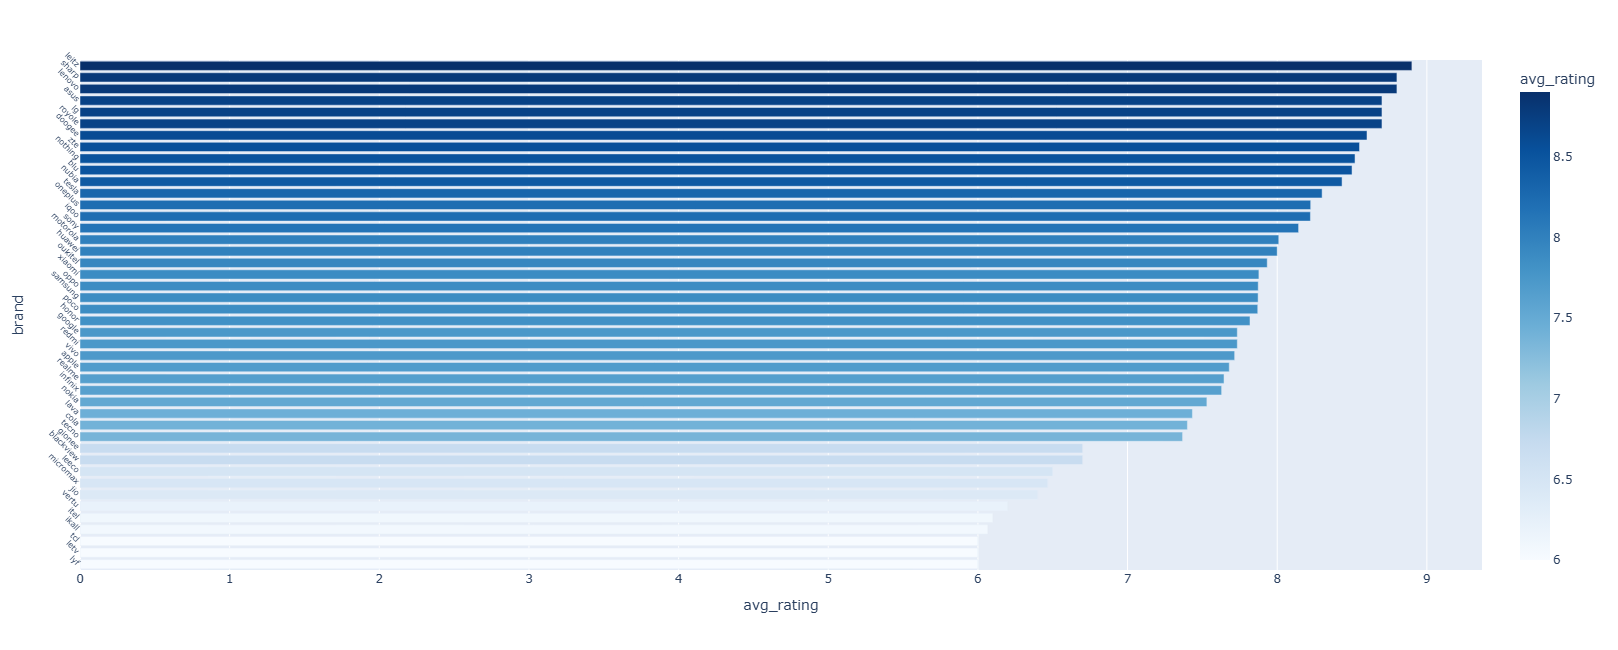

In [458]:
import plotly.io as pio
from plotly.offline import *
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

g = px.bar(gb1.dropna(), y="brand", x="avg_rating", color="avg_rating", color_continuous_scale="blues")

g.update_layout({"height": 650, 
                 "yaxis": {"tickangle": 45, "tickfont": {"size": 8}}})

In [ ]:
#Leitz is top-rated company

In [ ]:
# really two answers: 1, mean

In [325]:
# gb2 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).reset_index()
# gb2.columns = ["brand", "count", "avg_rating_mean"]
# gb2 = gb2.sort_values(by="avg_rating_mean", ascending=True)
# g = px.bar(gb2.dropna(), y="brand", x="avg_rating_mean", color="count", color_continuous_scale="plasma")

# g.update_layout({"height": 650, 
#                  "yaxis": {"tickangle": 45, "tickfont": {"size": 8}}})

In [326]:
# px.scatter(gb2, x="avg_rating_mean", y="avg_rating_mean", hover_data="brand", size="count", color="count").update_traces({"marker":{"line": {"width": 1, "color": "black"}}})

In [140]:
# each model still has n> 30 reviews, so the score is valid.

In [ ]:
# second answer, take the max for each brand

In [327]:
# gb3 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "max"]}).reset_index()
# gb3.columns = ["brand", "count", "avg_rating_max"]
# gb3 = gb3.sort_values(by="avg_rating_max", ascending=True)
# g = px.bar(gb3.dropna(), y="brand", x="avg_rating_max", color="avg_rating_max", color_continuous_scale="plasma")

# g.update_layout({"height": 650, 
#                  "yaxis": {"tickangle": 45, "tickfont": {"size": 8}}})

In [ ]:
# order this to have a secondary sort by count of  8.9 phones

In [328]:
# # hr_mk = ( gb2["avg_rating"] == 8.9 )

# gb3

In [ ]:
# third answer, filter based on legit brands

In [ ]:
# for brands with more than say 10 models...

In [329]:
# ct_mk = ( gb2["count"] >= 10 ) 

In [330]:
# gb2 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).reset_index()
# gb2.columns = ["brand", "count", "avg_rating_mean"]
# gb2 = gb2.sort_values(by="avg_rating_mean", ascending=True)
# g = px.bar(gb2[ct_mk].dropna(), y="brand", x="avg_rating_mean", color="avg_rating_mean", color_continuous_scale="plasma")

# g.update_layout({"height": 650, 
#                  "yaxis": {"tickangle": 45, "tickfont": {"size": 10}}})

In [331]:
# gb2[ct_mk].dropna().sort_values(by="avg_rating_mean", ascending=False)[:10]

In [ ]:
# most popular smartphone brand:
    #-> 3rd answer: Oneplus and IQOO very nearly tied

In [332]:
# gb4 = smarts.groupby(["brand", "model"]).agg({"avg_rating": "mean"}).reset_index()

In [333]:
# px.scatter(gb4.dropna(), y="model", x="avg_rating", color="brand", color_discrete_sequence=px.colors.qualitative.T10).update_layout({"height": 650})

In [334]:
# gb5 = smarts.groupby(["model", "brand"]).agg({"price": "mean"}).reset_index()
# # gb5.columns = ["model", "Brand", "price"]
# gb5 = gb5.sort_values(by="price", ascending=False)

In [335]:
# g = px.bar(gb5[:50][::-1], y="model", x="price", color="price")

# g.update_layout({"height": 500, 
#                  "yaxis": {"tickangle": 45, "tickfont": {"size": 9}}})

In [336]:
# gb5.sort_values(by="price", ascending=False)[:5]

In [337]:
# what is the fastest model
# what model has the best camera
# what is the largest model
# what model has the most battery life

In [338]:
# gb8 = smarts.groupby(["model", "brand"]).agg({"total_res": "mean"}).reset_index().sort_values(by="total_res", ascending=False)
# px.bar(gb8[::-1][:50], y="model", x="total_res", color="total_res").update_traces(marker={"line": {"width": 0}, "opacity": 0.8})

In [339]:
# gb9 = smarts.groupby(["model", "brand"]).agg({"battery_capacity": "mean"}).reset_index().sort_values(by="battery_capacity", ascending=False)
# px.bar(gb9[::-1], y="model", x="battery_capacity", color="battery_capacity").update_traces(marker={"line": {"width": 0}, "opacity": 0.8})

In [340]:
# smarts.columns

In [341]:
# gb7 = smarts.groupby(["model", "brand"]).agg({"primary_camera_rear": "mean"}).sort_values(by="primary_camera_rear", ascending=False).reset_index()
# px.bar(gb7[::-1], y="model", x="primary_camera_rear", color="primary_camera_rear")b8 = smarts.groupby(["model", "brand"]).agg({"total_res": "mean"})
# px.bar(gb8[::-1], y="model"

In [342]:
# gb6 = smarts.groupby(["model", "brand"]).agg({"processor_speed": "mean"}).sort_values(by="processor_speed", ascending=False).reset_index()
# px.bar(gb6.dropna()[::-1], y="model", x="processor_speed", color="processor_speed").update_traces(marker={"line": {"width": 0}, "opacity": 0.2})

In [343]:
# 

# Summary of data
- scores range from 6-9
- dozens of phone brands
- hundreds of phone models
- many brands have a range of scores

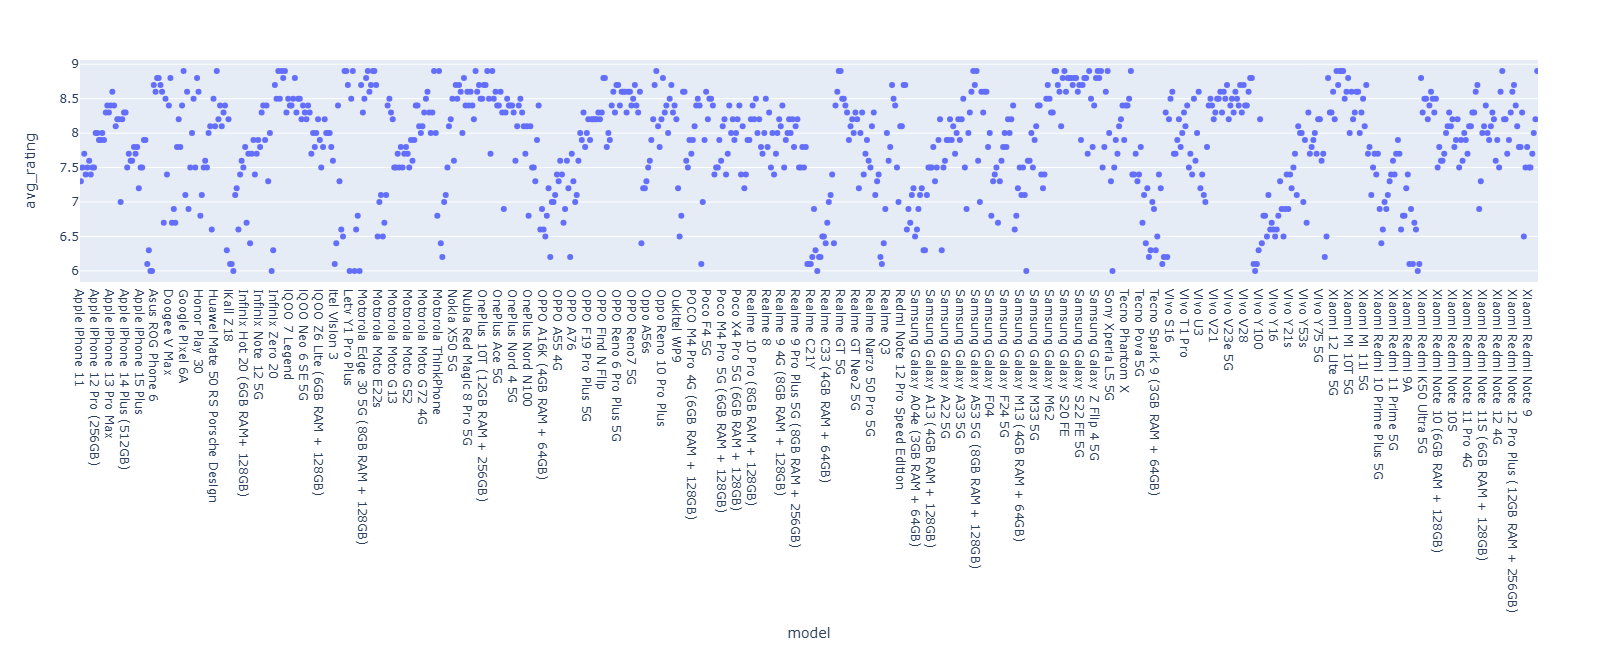

In [513]:
px.strip(gb4.dropna(), x="model", y="avg_rating").update_layout({"height": 650})

# Step 6: What are the most popular smartphones?

1. how do we define "best brand"?
- A) a brand's best phone? (max individual phone)
- B) most consistently has high ratings? (mean of all phones)
- C) most amount of max-rated phones? (most top-rated phones)

Let's go thru back to front.

### C: most amount of maxed out phones
arrange data by brand

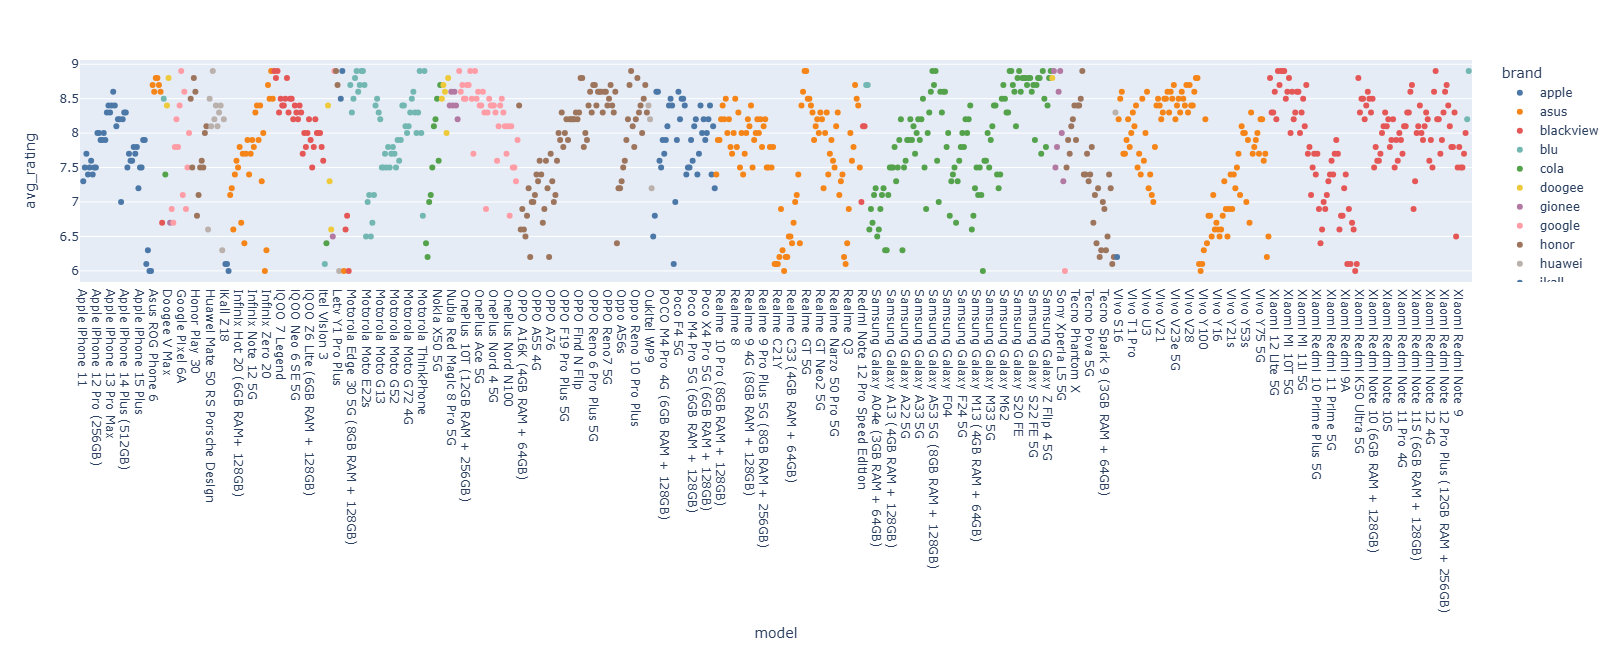

In [460]:
g = px.strip(gb4.dropna(), x="model", y="avg_rating", color="brand", color_discrete_sequence=px.colors.qualitative.T10).update_layout({"height": 650})
g

*zoom in on phones with the maxium rating*

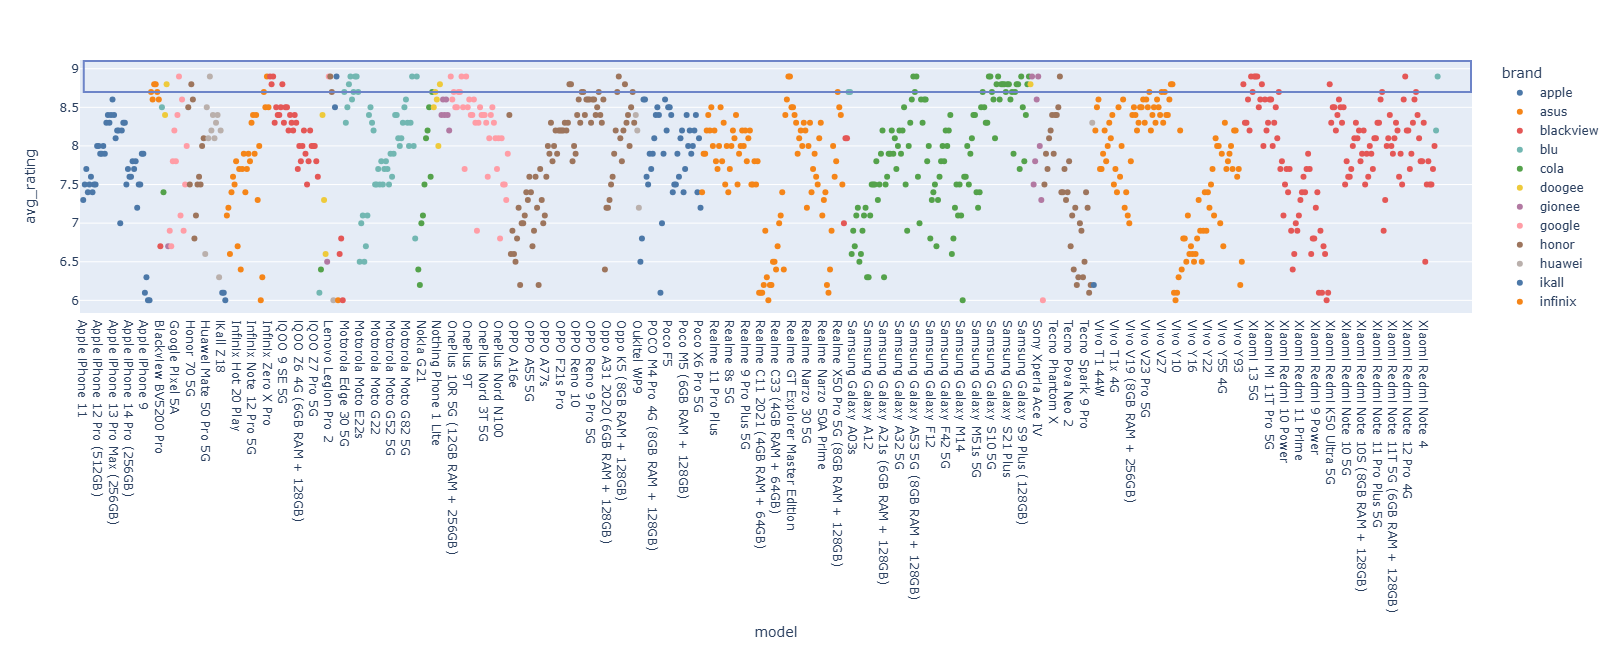

In [461]:
g.add_shape(type="rect", 
              x0=0, y0=8.7, x1=900, y1=9.1,
              line=dict(color="#6d84c8", width=2))

*many brands have top-rated phones (max rating = 8.9)*

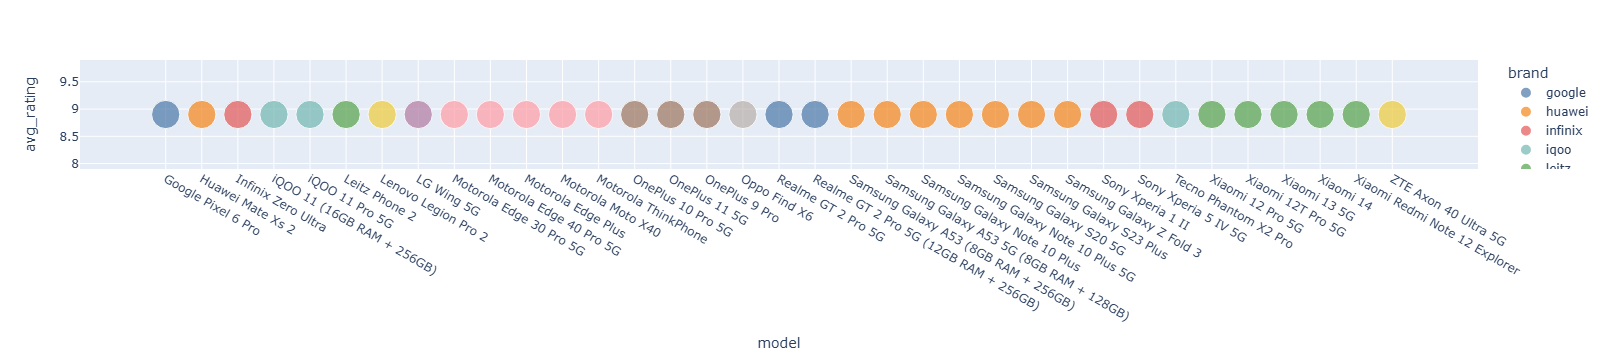

In [473]:
hr_mk = ( gb4["avg_rating"] == 8.9 )

h = px.scatter(gb4[hr_mk], x="model", y="avg_rating", size="avg_rating", color="brand", color_discrete_sequence=px.colors.qualitative.T10)
h

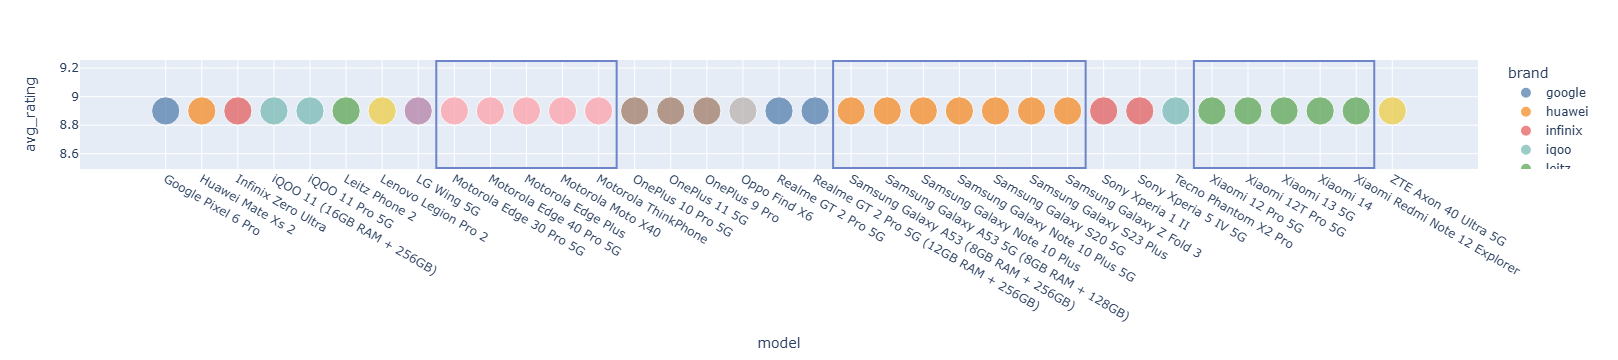

In [474]:
h.add_shape(
    type="rect",
    x0=7.5, x1=12.5,
    y0=8.5, y1=9.25,
    line={"color": "#6d84c8"},
)
h.add_shape(
    type="rect",
    x0=18.5, x1=25.5,
    y0=8.5, y1=9.25,
    line={"color": "#6d84c8"},
)
h.add_shape(
    type="rect",
    x0=28.5, x1=33.5,
    y0=8.5, y1=9.25,
    line={"color": "#6d84c8"},
)

### Answer, 1C) 
in the absence of sales data and with the inclusion of outlier brands who produce just 1 phone*, most popular smartphone brand **by number of top-rated phones** is:

- ***Samsung***, with 7 top-rated phones.
- *Motorola* and *Xiaomi* come in at second
- *Oneplus* comes in at third

In [515]:
gb4[hr_mk].groupby(["brand"]).count().reset_index().sort_values(by="avg_rating", ascending=False).reset_index(drop=True)

,brand,model,avg_rating
0,samsung,7,7
1,motorola,5,5
2,xiaomi,5,5
3,oneplus,3,3
4,realme,2,2
5,iqoo,2,2
6,sony,2,2
7,huawei,1,1
8,lg,1,1
9,lenovo,1,1


### Part 1B)
Data ascending by pure mean:
- Average of all phones

In [525]:
gb1.dropna().sort_values(by="avg_rating", ascending=False)[:10].reset_index(drop=True)

,brand,avg_rating
0,leitz,8.90
1,lenovo,8.80
2,sharp,8.80
3,asus,8.70
4,lg,8.70
5,royole,8.70
6,doogee,8.60
7,zte,8.55
8,nothing,8.52
9,blu,8.50


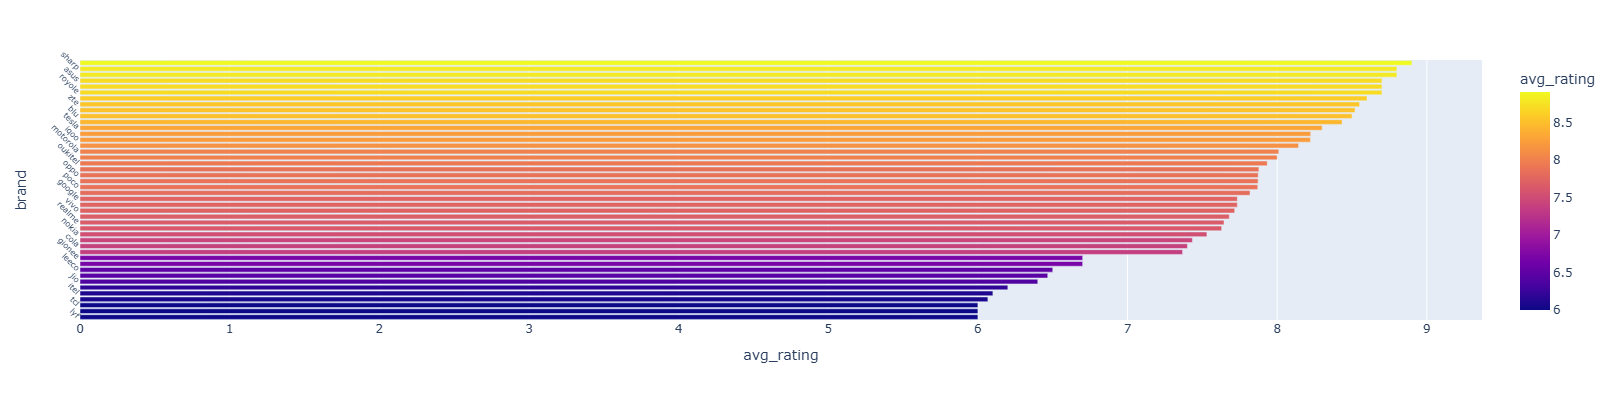

In [303]:
g = px.bar(gb1.dropna(), y="brand", x="avg_rating", color="avg_rating")

g.update_layout({"height": 400, "width": 450, 
                 "yaxis": {"tickangle": 45, "tickfont": {"size": 8}}})

*let's add in "count"*

In [524]:
gb2.sort_values(by="avg_rating_mean", ascending=False).reset_index(drop=True)[:10]

,brand,count,avg_rating_mean
0,leitz,1,8.90
1,lenovo,2,8.80
2,sharp,1,8.80
3,asus,6,8.70
4,lg,2,8.70
5,royole,2,8.70
6,doogee,2,8.60
7,zte,2,8.55
8,nothing,5,8.52
9,blu,1,8.50


**We can think of these brands as an "under the radar" cohort of smartphone brands.**

**Insight**: Why is this important?
1. less homogeneity of brands creates an opportunity to for consumers to "be different" with their choice of smartphone brand
   - example: Nothing phone, "minimalist"
2. some smartphones may be ultra-specific, serving only one market niche
   - example: Doogee, battery life

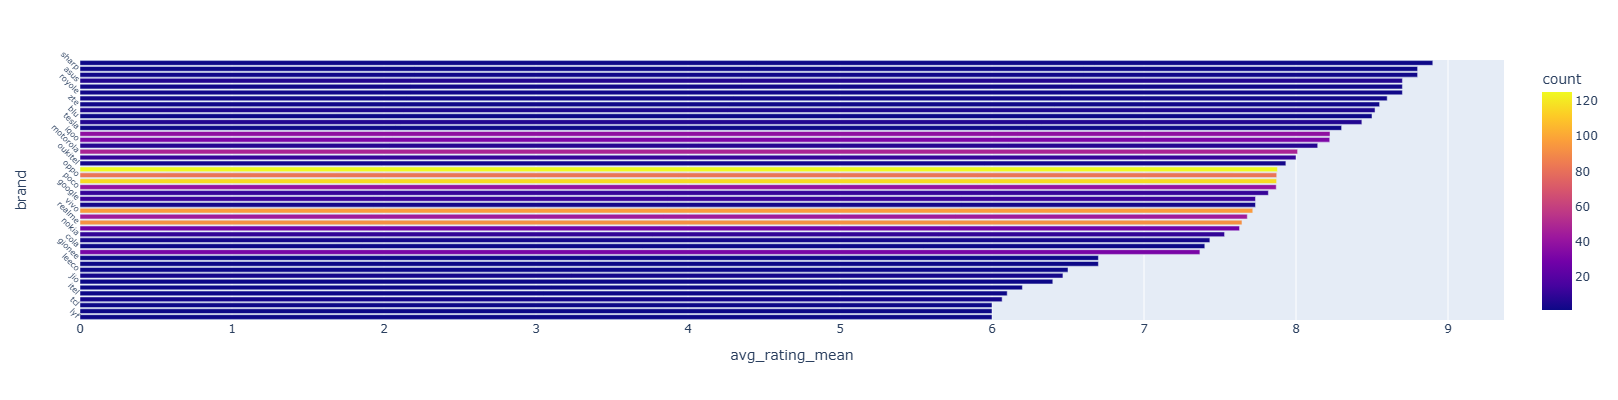

In [527]:
gb2 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).reset_index()
gb2.columns = ["brand", "count", "avg_rating_mean"]
gb2 = gb2.sort_values(by="avg_rating_mean", ascending=True)
g = px.bar(gb2.dropna(), y="brand", x="avg_rating_mean", color="count", color_continuous_scale="plasma")

g.update_layout({"height": 400, "width": 450, 
                 "yaxis": {"tickangle": 45, "tickfont": {"size": 8}}})

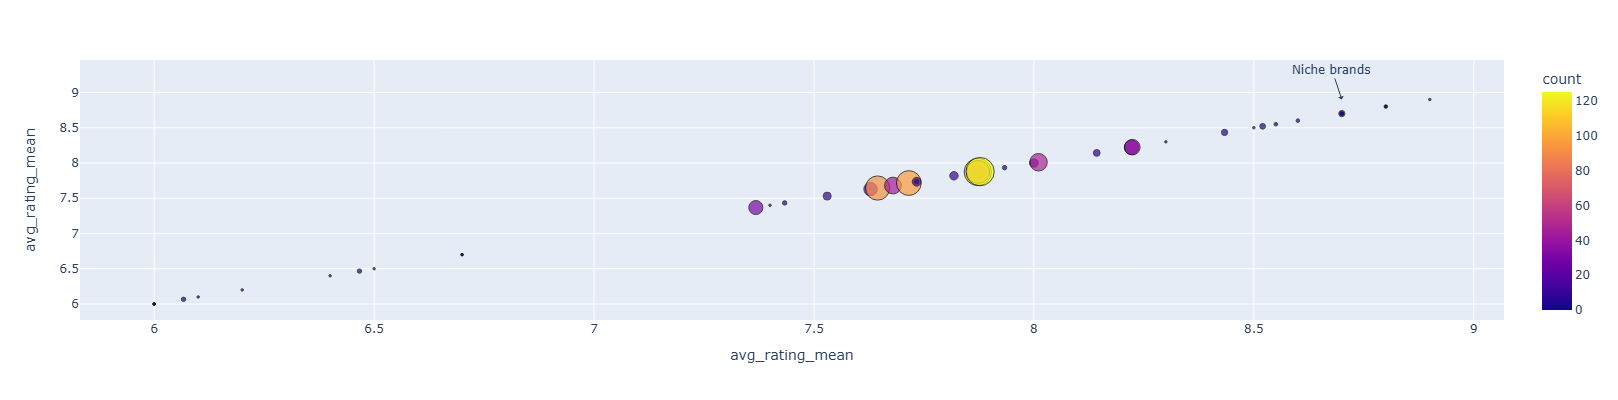

In [541]:
# some companies make significantly more phones than others, and those are the largest brands
gb2 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).reset_index()
gb2.columns = ["brand", "count", "avg_rating_mean"]
gb2 = gb2.sort_values(by="avg_rating_mean", ascending=True)
g = px.bar(gb2[ct_mk].dropna(), y="brand", x="avg_rating_mean", color="avg_rating_mean", color_continuous_scale=[px.colors.sequential.Plasma[-1]] * 100)

g = px.scatter(gb2, x="avg_rating_mean", y="avg_rating_mean", hover_data="brand", size="count", color="count").update_traces({"marker":{"line": {"width": 1, "color": "black"}}}).update_layout({"width": 450, "height": 400})
g.add_annotation(x=8.7, y=8.9,
            text="Niche brands",
            showarrow=True,
            arrowhead=1)

Organized into a barchart. Brands with < 10 phones.

* Remember that the "average problem" still applies. (top rated brand has only produced one phone, and it just happens to by top-rated. Doesn't mean that brand is the top smartphone maker in the market.)

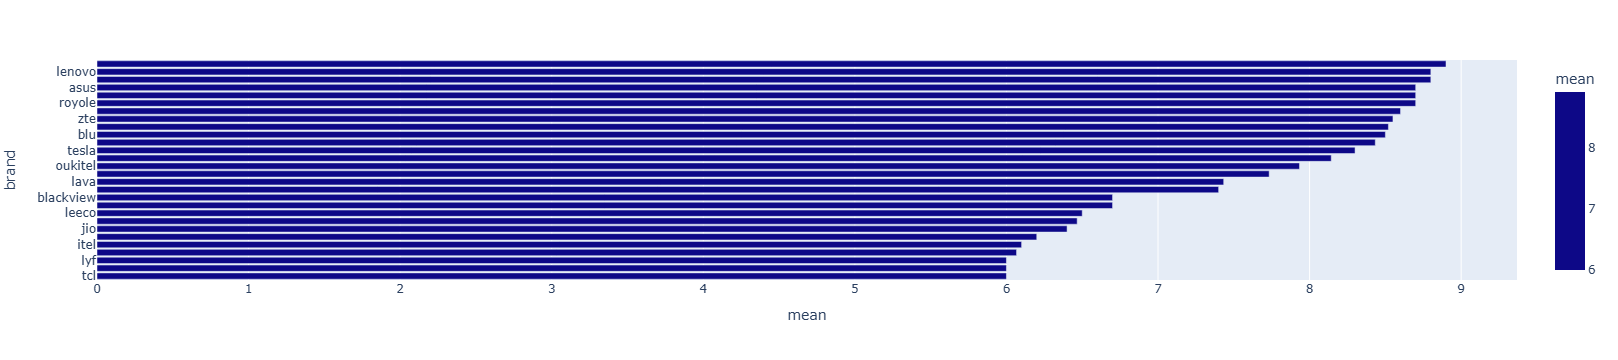

In [530]:
gb13 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).reset_index()
gb13.columns = ["brand", "count", "mean"]

lc_mk = ( gb13["count"] < 10 )

gb13 = gb13[lc_mk].dropna().sort_values(by="mean", ascending=False).reset_index(drop=True)
px.bar(gb13[::-1], x="mean", y="brand", color="mean", color_continuous_scale=[px.colors.sequential.Plasma[0]] * 100)

### Answer 1B) i)
Averaging by pure mean, and filtering for < 10 phones per brand, we uncover some "under the radar" smartphone brands. These include:
- Leitz (germany camera company)
- Nothing (minimalist new brand)
- Royale (only foldable screens)

In [549]:
gb12 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).reset_index()
gb12.columns = ["brand", "count", "mean"]
gb12.dropna().sort_values(by="mean", ascending=False).reset_index(drop=True)[:10]

,brand,count,mean
0,leitz,1,8.90
1,lenovo,2,8.80
2,sharp,1,8.80
3,asus,6,8.70
4,lg,2,8.70
5,royole,2,8.70
6,doogee,2,8.60
7,zte,2,8.55
8,nothing,5,8.52
9,blu,1,8.50


### Answer 1B) ii)
Averaging by pure mean, and filtering for >= 10 phones per brand, we uncover some **"big players"** smartphone brands. tThe best average rating is a tie between:
- **OnePlus**
- **Iqoo**

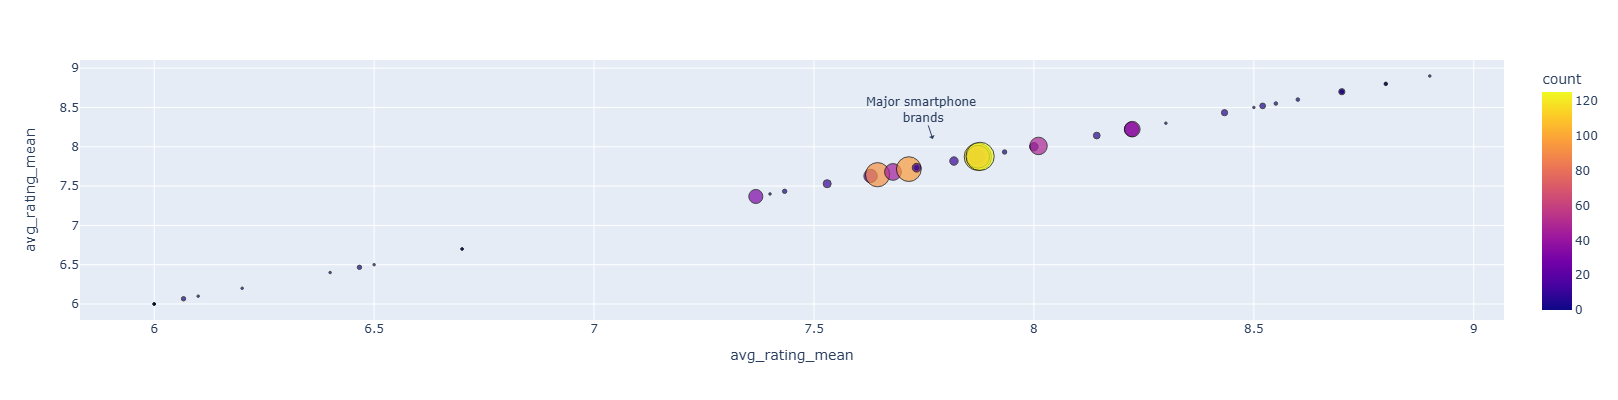

In [545]:
# some companies make significantly more phones than others, and those are the largest brands
gb2 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).reset_index()
gb2.columns = ["brand", "count", "avg_rating_mean"]
gb2 = gb2.sort_values(by="avg_rating_mean", ascending=True)
g = px.bar(gb2[ct_mk].dropna(), y="brand", x="avg_rating_mean", color="avg_rating_mean", color_continuous_scale=[px.colors.sequential.Plasma[-1]] * 100)

g = px.scatter(gb2, x="avg_rating_mean", y="avg_rating_mean", hover_data="brand", size="count", color="count").update_traces({"marker":{"line": {"width": 1, "color": "black"}}}).update_layout({"width": 450, "height": 400})
g.add_annotation(x=7.77, y=8.1,
            text="Major smartphone <br>brands",
            showarrow=True,
            arrowhead=1)

In [547]:
gb14 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "mean"]}).dropna().reset_index()
gb14.columns = ["brand", "count", "mean"]

hc_mk = ( gb14["count"] >= 10 )

gb14 = gb14[hc_mk]

gb14.sort_values(by="mean", ascending=False).reset_index(drop=True)[:5]

,brand,count,mean
0,oneplus,38,8.223684
1,iqoo,32,8.221875
2,motorola,48,8.010417
3,huawei,11,8.000000
4,xiaomi,125,7.877600


data organized into a bar chart. The highest rated **top players** are visible quite close.
- This would be a valid answer to "best smartphone brand", as all brands are real smartphone brands (filtered for models >= 10)

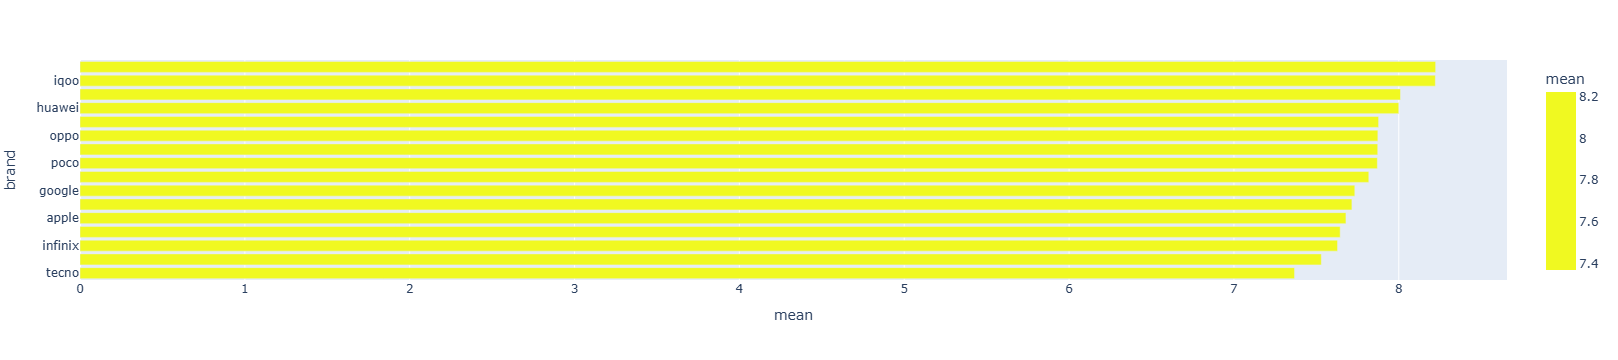

In [536]:
px.bar(gb14.sort_values(by="mean", ascending=True), y="brand", x="mean", color="mean", color_continuous_scale=[px.colors.sequential.Plasma[-1]] * 100)

### Part 1A)
organizing by a company's best phone (max)

In [554]:
gb3.sort_values(by="avg_rating_max", ascending=False)[:20].reset_index(drop=True)[:50]

,brand,count,avg_rating_max
0,realme,92,8.9
1,oppo,82,8.9
2,oneplus,38,8.9
3,motorola,48,8.9
4,lenovo,2,8.9
5,leitz,1,8.9
6,lg,2,8.9
7,samsung,116,8.9
8,tecno,31,8.9
9,sony,7,8.9


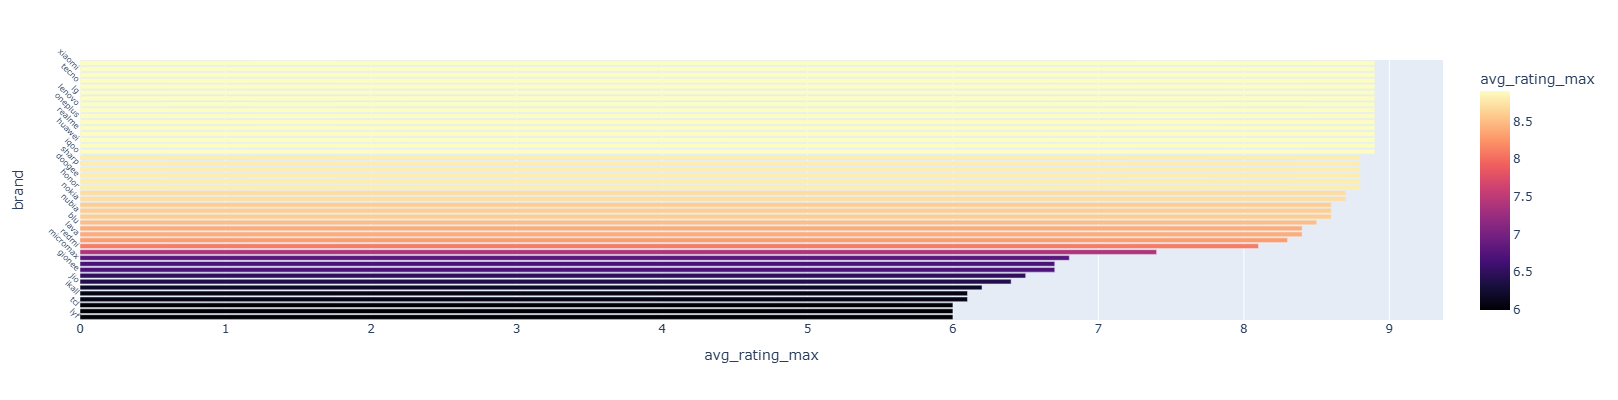

In [555]:
gb3 = smarts.groupby(["brand"]).agg({"avg_rating": ["count", "max"]}).reset_index()
gb3.columns = ["brand", "count", "avg_rating_max"]
gb3 = gb3.sort_values(by="avg_rating_max", ascending=True)
g = px.bar(gb3.dropna(), y="brand", x="avg_rating_max", color="avg_rating_max", color_continuous_scale="magma")

g.update_layout({"height": 400, "width":550, 
                 "yaxis": {"tickangle": 45, "tickfont": {"size": 8}}})

In [566]:
mx_mk =  ( gb3["avg_rating_max"] < 7 )
gb3[mx_mk]["brand"].unique()

array(['lyf', 'letv', 'tcl', 'itel', 'ikall', 'vertu', 'jio', 'leeco',
       'gionee', 'blackview', 'micromax'], dtype=object)

In [565]:
gb3.dropna().sort_values(by="avg_rating_max", ascending=False).reset_index(drop=True)

,brand,count,avg_rating_max
0,realme,92,8.9
1,oppo,82,8.9
2,oneplus,38,8.9
3,motorola,48,8.9
4,lenovo,2,8.9
5,leitz,1,8.9
6,lg,2,8.9
7,samsung,116,8.9
8,tecno,31,8.9
9,sony,7,8.9


### Answer 1A)

there are 16 phone brands  that have at least one phone with a maxed-out rating (8.9). these include: ['iqoo','infinix', 'huawei', 'google', 'realme', 'oppo', 'oneplus',
       'motorola', 'lenovo', 'leitz', 'lg', 'samsung', 'tecno', 'sony',
       'xiaomi', 'zte']

On the flip side, there are 10 brands whose top-rated phone has a rating of < 7.0. These include: 'lyf', 'letv', 'tcl', 'itel', 'ikall', 'vertu', 'jio', 'leeco',
       'gionee', 'blackview', 'micromax'

**insight**: don't bet on any of the phone brands in the latter category
       

# Step 7: What is the most popular *model*, among all brands?

There are 980 models. Which models scored the highest?

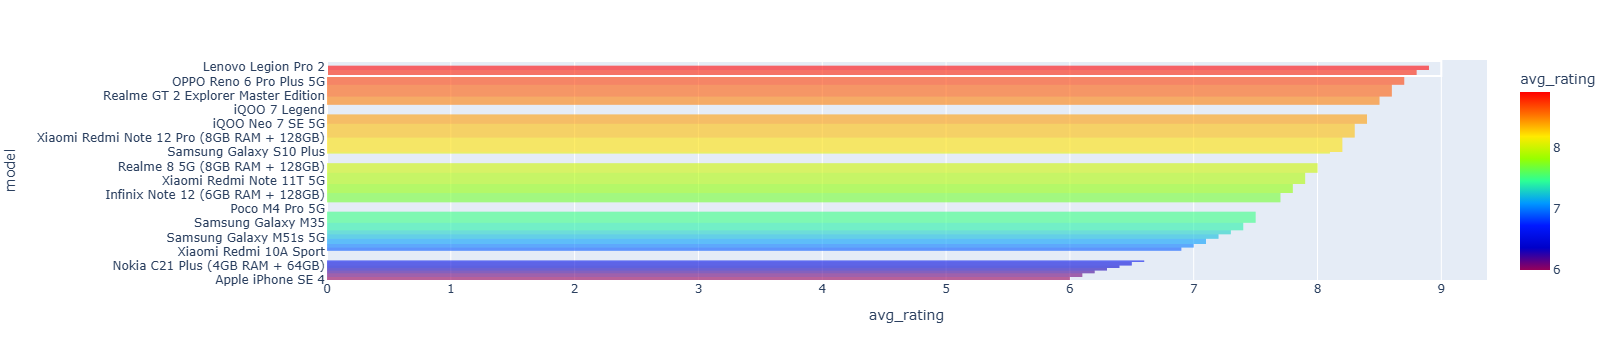

In [597]:
# what is the most popular rated phone?
# a 34-way tie. Brands are:
gb10 = smarts.groupby(["model", "brand"]).agg({"avg_rating": "mean"}).reset_index().sort_values(by="avg_rating", ascending=False)
g = px.bar(gb10[::-1].dropna(), y="model", x="avg_rating", color="avg_rating", color_continuous_scale="rainbow").update_traces(marker={"line": {"width": 0}, "opacity": 0.8})
g.add_shape(
    type="rect",
    x0=0, x1=9,
    y0=820, y1=880,
    line={"color": "white"}
)


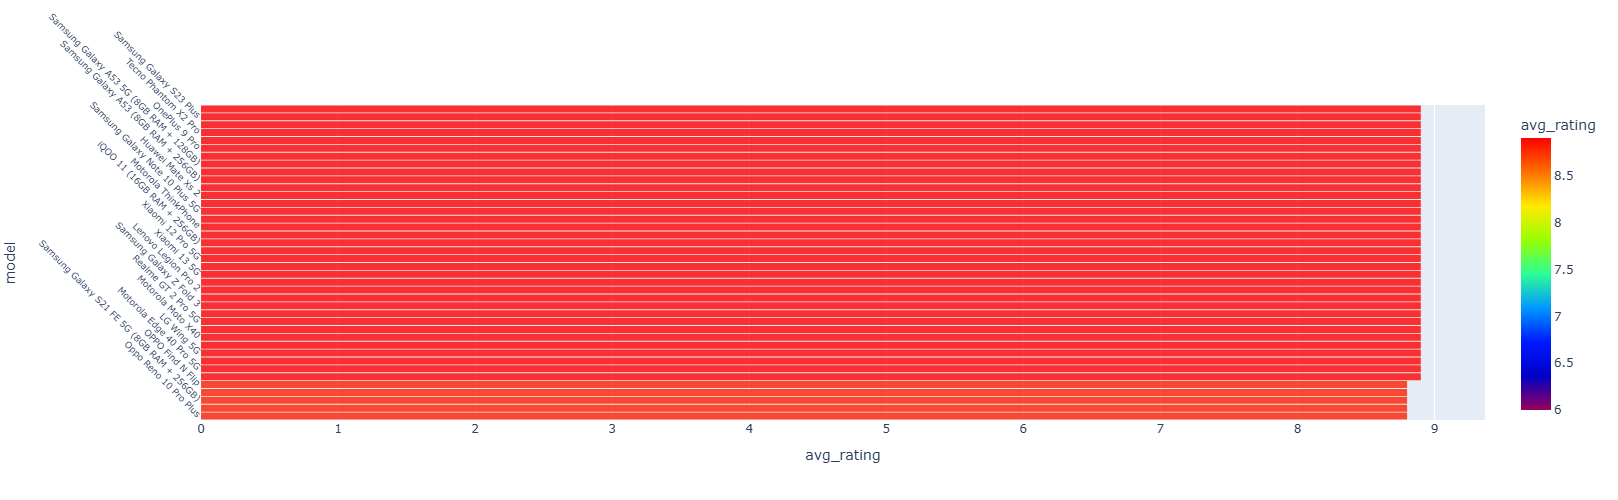

In [614]:
px.bar(gb10[:40][::-1].dropna(), y="model", x="avg_rating", color="avg_rating", color_continuous_scale="rainbow", range_color=[gb10["avg_rating"].min(), gb10["avg_rating"].max()]).update_traces(
    marker={"line": {"width": 0}, "opacity": 0.8}
).update_layout({
    "bargap": 0.1,
    "height": 500, 
    "yaxis": {"tickangle": 45, "tickfont": {"size": 9}}})

In [601]:
hr_mk = ( gb10["avg_rating"] == 8.9 )
len(gb10[hr_mk]) / len(gb10)

0.03571428571428571

### Answer to question 2
There are 35 models that have the highet rating, as shown the table below. **This represents 3.6% of all models.**

In [423]:
gb10.reset_index(drop=True)[:50]

,model,brand,avg_rating
0,Oppo Find X6,oppo,8.9
1,Samsung Galaxy S23 Plus,samsung,8.9
2,Infinix Zero Ultra,infinix,8.9
3,Tecno Phantom X2 Pro,tecno,8.9
4,Sony Xperia 5 IV 5G,sony,8.9
5,OnePlus 9 Pro,oneplus,8.9
6,OnePlus 11 5G,oneplus,8.9
7,Samsung Galaxy A53 5G (8GB RAM + 128GB),samsung,8.9
8,Xiaomi Redmi Note 12 Explorer,xiaomi,8.9
9,Samsung Galaxy A53 (8GB RAM + 256GB),samsung,8.9


# Step 8: what is the most expensive smartphone model?

In [603]:
gb5[:10]

,model,brand,price
689,Vertu Signature Touch,vertu,650000.0
866,Xiaomi Redmi K20 Pro Signature Edition,xiaomi,480000.0
94,Huawei Mate 50 RS Porsche Design,huawei,239999.0
91,Huawei Mate 30 RS Porsche Design,huawei,214990.0
830,Xiaomi Mi Mix Alpha,xiaomi,199990.0
32,Apple iPhone 14 Pro Max (1TB),apple,182999.0
19,Apple iPhone 13 Pro Max (1TB),apple,179900.0
29,Apple iPhone 14 Pro (1TB),apple,172999.0
34,Apple iPhone 14 Pro Max (512GB),apple,169900.0
95,Huawei Mate X,huawei,169000.0


### Answer:
the "Vertu Signature Touch" is the most expensive model. See below visualization for just how expensive.

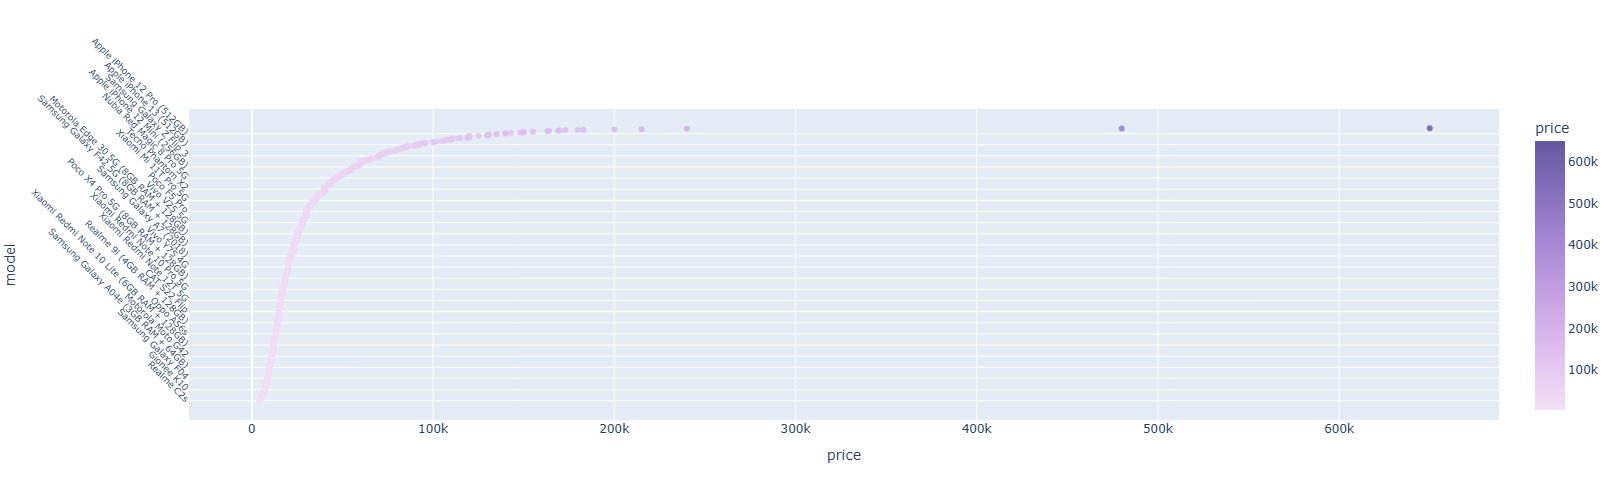

In [612]:
gb5 = smarts.groupby(["model", "brand"]).agg({"price": "mean"}).reset_index()
gb5 = gb5.sort_values(by="price", ascending=False)

g = px.scatter(gb5[::-1], y="model", x="price", color="price", color_continuous_scale="purp")

g.update_layout({"height": 500, 
                 "yaxis": {"tickangle": 45, "tickfont": {"size": 9}}}).update_traces(marker={"line": {"width": 0}, "opacity": 0.8})

# Step 8: What is the fastest phone?

Units are in __,


In [615]:
gb6 = smarts.groupby(["model", "brand"]).agg({"processor_speed": "mean"}).sort_values(by="processor_speed", ascending=False).reset_index()

gb6[:20]

,model,brand,processor_speed
0,Apple iPhone 14,apple,3.22
1,Apple iPhone 13 Pro Max (256GB),apple,3.22
2,Apple iPhone 14 (256GB),apple,3.22
3,Apple iPhone 14 (512GB),apple,3.22
4,Apple iPhone 13 Pro (256GB),apple,3.22
5,Apple iPhone 13 Pro Max,apple,3.22
6,Apple iPhone 13 Pro (1TB),apple,3.22
7,Apple iPhone 14 Plus (256GB),apple,3.22
8,Apple iPhone 13 Pro Max (1TB),apple,3.22
9,Apple iPhone 14 Plus (512GB),apple,3.22


### Answer:

Apple has all models with fastest processing speed, in a 17-way tie at 3.22

However, there are 96 other phones with just a slightly slower processor at 3.20, from companies like OnePlus, Xiaomi, Iqoo, and others.

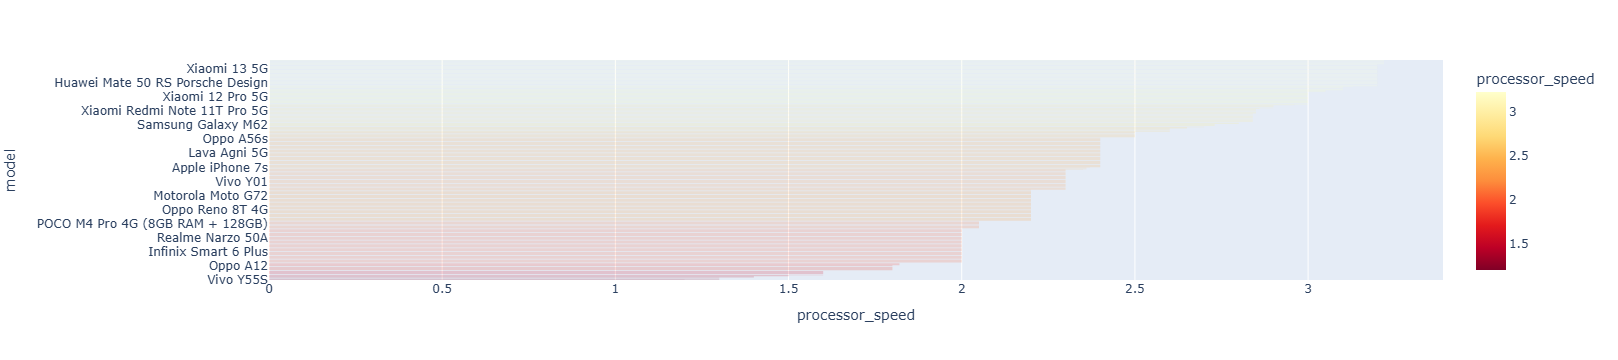

In [616]:
px.bar(gb6.dropna()[::-1], y="model", x="processor_speed", color="processor_speed", color_continuous_scale=px.colors.sequential.YlOrRd_r).update_traces(marker={"line": {"width": 0}, "opacity": 0.2})

In [618]:
pr_mk = ( gb6["processor_speed"] == 3.20 )

len(gb6[pr_mk])

94

In [620]:
gb6[pr_mk]["brand"].unique()

array(['oneplus', 'iqoo', 'xiaomi', 'asus', 'oppo', 'vivo', 'realme',
       'poco', 'nubia', 'nothing', 'nokia', 'samsung', 'motorola',
       'huawei', 'zte'], dtype=object)

# Step 9: answer 5

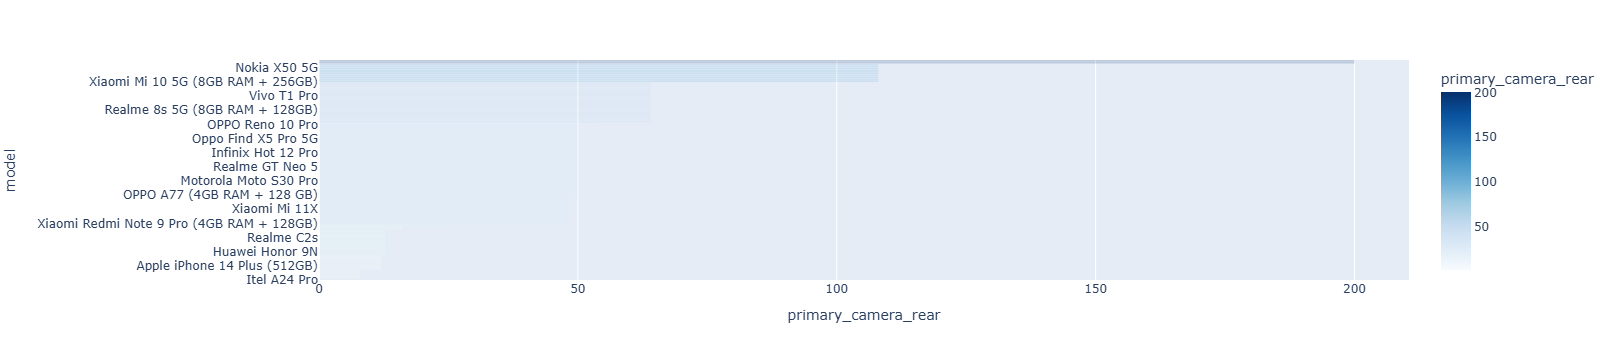

In [624]:
# which phone has the best camera?
# 17 way tie at 200, with phones from brands:
# 'nokia', 'xiaomi', 'samsung', 'motorola', 'infinix', 'honor'.
# after the 200, there's a steep drop to 108 with 80 different phones.
gb7 = smarts.groupby(["model", "brand"]).agg({"primary_camera_rear": "mean"}).sort_values(by="primary_camera_rear", ascending=False).reset_index()
px.bar(gb7[::-1], y="model", x="primary_camera_rear", color="primary_camera_rear", color_continuous_scale="blues").update_traces(marker={"line": {"width": 0}, "opacity": 0.2})

In [452]:
hc_mk = ( gb7["primary_camera_rear"] == 200 )
gb7[hc_mk]["brand"].unique()

array(['nokia', 'xiaomi', 'samsung', 'motorola', 'infinix', 'honor'],
      dtype=object)

In [449]:
gb7[:50]

,model,brand,primary_camera_rear
0,Nokia N73 5G,nokia,200.0
1,Nokia X60 5G,nokia,200.0
2,Xiaomi Redmi Note 12 Discovery Edition,xiaomi,200.0
3,Xiaomi Redmi Note 12 Explorer,xiaomi,200.0
4,Samsung Galaxy S24 Ultra,samsung,200.0
5,Nokia X60 Pro 5G,nokia,200.0
6,Motorola Edge 30 Ultra,motorola,200.0
7,Motorola Edge 30 Ultra (12GB RAM + 256GB),motorola,200.0
8,Motorola Moto X30 Pro,motorola,200.0
9,Motorola Moto Edge X30 Pro,motorola,200.0


# Step 10: answer 6

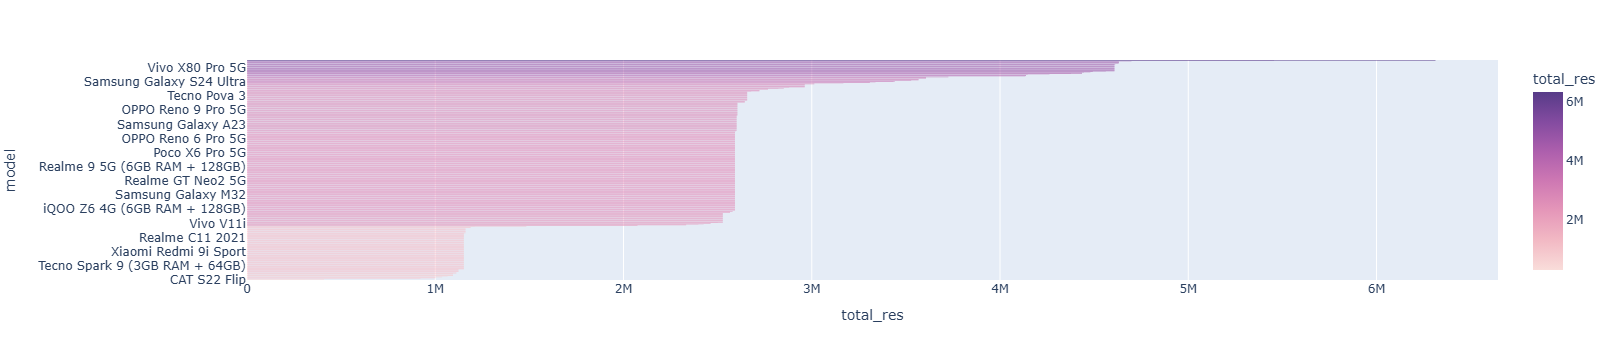

In [456]:
# best resolution is a three way tie of all Sony phones
gb8 = smarts.groupby(["model", "brand"]).agg({"total_res": "mean"}).reset_index().sort_values(by="total_res", ascending=False)
px.bar(gb8[::-1], y="model", x="total_res", color="total_res", color_continuous_scale="Purpor").update_traces(marker={"line": {"width": 0}, "opacity": 0.8})

In [291]:
gb8[:10]

,model,brand,total_res
646,Sony Xperia 1 IV (12GB RAM + 512GB),sony,6312960.0
645,Sony Xperia 1 II,sony,6312960.0
653,Sony Xperia Pro-I,sony,6312960.0
95,Huawei Mate X,huawei,5456000.0
96,Huawei Mate Xs 2,huawei,5456000.0
310,OnePlus 12 Pro,oneplus,4913280.0
830,Xiaomi Mi Mix Alpha,xiaomi,4698000.0
470,Realme GT 2 Pro 5G,realme,4631040.0
308,OnePlus 11 Pro,oneplus,4631040.0
307,OnePlus 11 5G,oneplus,4631040.0


# Step 11: Answer 7

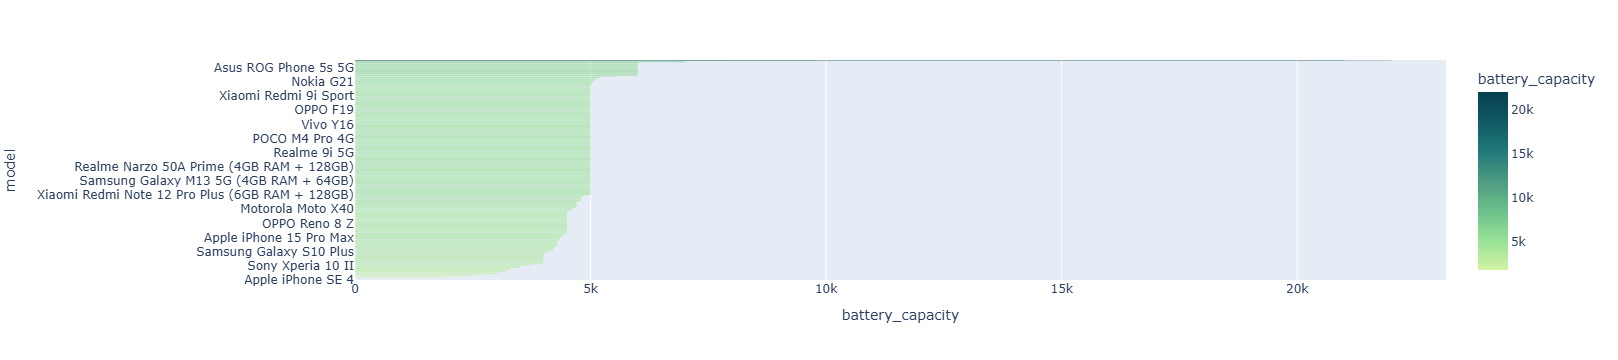

In [623]:
# best battery capactiy  is the Doogee V Max, with the Oukitel WP19 coming in at a close second
gb9 = smarts.groupby(["model", "brand"]).agg({"battery_capacity": "mean"}).reset_index().sort_values(by="battery_capacity", ascending=False)
px.bar(gb9[::-1], y="model", x="battery_capacity", color="battery_capacity", color_continuous_scale="Emrld").update_traces(marker={"line": {"width": 0}, "opacity": 0.8})

In [293]:
gb9[:10]

,model,brand,battery_capacity
58,Doogee V Max,doogee,22000.0
366,Oukitel WP19,oukitel,21000.0
367,Oukitel WP21,oukitel,9800.0
368,Oukitel WP9,oukitel,8000.0
674,Tecno Pova Neo 2,tecno,7000.0
581,Samsung Galaxy F63,samsung,7000.0
604,Samsung Galaxy M62,samsung,7000.0
669,Tecno Pova 3,tecno,7000.0
668,Tecno Pova 2,tecno,7000.0
670,Tecno Pova 3 (6GB RAM + 128GB),tecno,7000.0
